![title](DEP_LOGO_2.jpg)

# Trend Station Water Quality Data 
## Web Application Demo

In [1]:
#HIDDEN

import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import csv
from geopy.geocoders import Nominatim
from time import sleep
import folium
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import seaborn as sns
from scipy import stats

In [2]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]

geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Flatwoods, WV")

longitude = location.longitude
latitude = location.latitude

# create map of West Virginia using latitude and longitude values
ts_locations = folium.Map(location=[latitude, longitude], tiles="OpenStreetMap", zoom_start=7.4)

# add markers to map
for lat, lng, label in zip(dfheadloc['latitude'], dfheadloc['longitude'], dfheadloc['station_id']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=True).add_to(ts_locations)  

ts_locations

## Trend Station Location

In [3]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]


def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    return unique

dropdown_stations_id = widgets.Dropdown(options = unique_sorted_values(dfheadloc.station_id), description='Trend Station')

output_two = widgets.Output()



def common_filtering(station):
    
    output_two.clear_output()
    
    
    global common_filter
    common_filter = dfheadloc[(dfheadloc.station_id == station)]
    
    with output_two:
        display(common_filter)
        
    
        
def dropdown_stations_id_eventhandler(change):
    common_filtering(change.new)

    
dropdown_stations_id.observe(dropdown_stations_id_eventhandler, names='value')
    
display(dropdown_stations_id)


Dropdown(description='Trend Station', options=('TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'TS007', …

In [4]:
#HIDDEN
display(output_two)

Output()

## Trend Station Data

In [5]:
#HIDDEN

df_comb = pd.read_csv('TS_New_Combined_Final.csv')
df_comb = df_comb.fillna(0)
#df_comb['test_batch_id'] = pd.to_datetime(df_comb['test_batch_id'], format="%m/%d/%Y")
df_comb['result_value'] = pd.to_numeric(df_comb['result_value'])
df_comb = df_comb.sort_values(by=['station_id', 'test_batch_id'])
#df_comb = df_comb.set_index('test_batch_id')

ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_stations = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.station_id), description='Trend Station')
dropdown_param = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.param_name), description='Parameter')

output_three = widgets.Output()
plot_output = widgets.Output()


def common_filtering1(station, param):
    
    output_three.clear_output()
    plot_output.clear_output()
    
    if (station == ALL) & (param == ALL):
        global common_filter1
        common_filter1 = df_comb
    elif (station == ALL):
        common_filter1 = df_comb[df_comb.param_name == param]
    elif (param == ALL):
        common_filter1 = df_comb[df_comb.station_id == station]
    else:
        common_filter1 = df_comb[(df_comb.station_id == station) & (df_comb.param_name == param)]
    
    with output_three:
        display(common_filter1)
        
    with plot_output:
        if param == ALL or station == ALL:
            print("No Available Plots for the Selected Station/Parameter Combination!")
        else:
            plt.figure(figsize=(20,8));
            plt.plot(common_filter1['result_value'], 'go--', linewidth=1, markersize=6);
            plt.grid();
            plt.ylabel(param, fontsize=15);
            plt.xlabel('Date', fontsize=15);
            plt.title(station, fontsize=25);
            plt.show();


def dropdown_stations_eventhandler(change):
    common_filtering1(change.new, dropdown_param.value)
    
def dropdown_param_eventhandler(change):
    common_filtering1(dropdown_stations.value, change.new)
    
dropdown_stations.observe(dropdown_stations_eventhandler, names='value')
dropdown_param.observe(dropdown_param_eventhandler, names='value')
    
display(dropdown_stations)
display(dropdown_param)

Dropdown(description='Trend Station', options=('ALL', 'TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'T…

Dropdown(description='Parameter', options=('ALL', 'ALKALINITY', 'ALUMINUM', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM'…

In [6]:
#HIDDEN
display(output_three)

Output()

In [9]:
#HIDDEN
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
display(plot_output)

Output(outputs=({'output_type': 'stream', 'text': 'No Available Plots for the Selected Station/Parameter Combi…

## Trend Station Statistics

Need to convert DataFrame structure prior to this step!

In [10]:
group = common_filter1.groupby('param_name')
df2 = pd.DataFrame(group.apply(lambda x: x['test_batch_id'].unique()))

df2.reset_index(inplace=True)
df2 = df2.rename({0: 'DATES'}, axis='columns')
df2

,param_name,DATES
0,ALKALINITY,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
1,ALUMINUM,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
2,ANTIMONY,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
3,ARSENIC,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
4,BERYLLIUM,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
5,BI-CARBONATE,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
6,CADMIUM,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
7,CALCIUM,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
8,CARBONATE,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."
9,CHROMIUM,"[1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1..."


In [11]:
param_dates = df2[df2.param_name == 'BERYLLIUM'].DATES.item()
param_dates[5]

'4/1/2016'

In [12]:
for i in param_dates:
    print(i)

1/1/2016
1/1/2017
1/1/2018
10/1/2016
10/1/2017
4/1/2016
4/1/2017
6/1/2018
8/1/2016


In [13]:
ts = dropdown_stations.value

output_four = widgets.Output()

df_comb = pd.read_csv('TS_New_Combined_Final.csv')
df_comb = df_comb.fillna(0)
df_comb = df_comb[df_comb['station_id'].str.contains(ts, na=False)]

group = df_comb.groupby('param_name')
df2 = pd.DataFrame(group.apply(lambda x: x['test_batch_id'].unique()))

df2.reset_index(inplace=True)
df2 = df2.rename({0: 'DATES'}, axis='columns')

dates = df2[df2.param_name == 'ARSENIC'].DATES.item()

initial_date = dates[0]

df_comb_date = common_filter1[common_filter1['station_id'].str.contains(ts, na=False)]
df_comb_date = df_comb_date[df_comb_date['test_batch_id'] == initial_date]
df_comb_date = df_comb_date.drop(['station_id', 'sample_id', 'fraction', 'result_unit', 'test_batch_id'], axis=1)
df_comb_date = df_comb_date.set_index('param_name').transpose()

#df_comb_date = df_comb_date.astype('float')
df_comb_date.columns = ['FIELD ph', 'FIELD CONDUCTIVITY','TEMPERATURE','FLOW', 'LAB CONDUCTIVITY', 'SULFATE', 'DISSOLVED SOLIDS', 'SUSPENDED SOLIDS', 'LAB ph', 'ALKALINITY', 'HOT ACIDITY', 'MINERAL ACIDITY', 'IRON_D', 'MANGANESE_D', 'ALUMINUM_D', 'IRON_T', 'MANGANESE_T', 'ALUMINUM_T', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'CADMIUM', 'CHROMIUM', 'COPPER', 'LEAD', 'MERCURY', 'NICKEL', 'SELENIUM', 'SILVER', 'THALLIUM', 'ZINC', 'CYANIDE', 'PHENOLS', 'NITRATE', 'SODIUM', 'CALCIUM', 'MAGNESIUM', 'POTASSIUM', 'BI-CARBONATE', 'CARBONATE', 'PHOSPHATE']

df_comb_concat = []
df_comb_concat = pd.concat([df_comb_date])

as_list = df_comb_concat.index.tolist()
idx = as_list.index('result_value')
as_list[idx] = initial_date
df_comb_concat.index = as_list

for i, date in enumerate(dates):
    
    df_comb_date = common_filter1[common_filter1['station_id'].str.contains(ts, na=False)]
    df_comb_date = df_comb_date[df_comb_date['test_batch_id'] == dates[i]]
    df_comb_date = df_comb_date.drop(['station_id', 'sample_id', 'fraction', 'result_unit', 'test_batch_id'], axis=1)
    df_comb_date = df_comb_date.set_index('param_name').transpose()
    
    #df_comb_date = df_comb_date.astype('float')

    df_comb_date.columns = ['FIELD ph', 'FIELD CONDUCTIVITY','TEMPERATURE','FLOW', 'LAB CONDUCTIVITY', 'SULFATE', 'DISSOLVED SOLIDS', 'SUSPENDED SOLIDS', 'LAB ph', 'ALKALINITY', 'HOT ACIDITY', 'MINERAL ACIDITY', 'IRON_D', 'MANGANESE_D', 'ALUMINUM_D', 'IRON_T', 'MANGANESE_T', 'ALUMINUM_T', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'CADMIUM', 'CHROMIUM', 'COPPER', 'LEAD', 'MERCURY', 'NICKEL', 'SELENIUM', 'SILVER', 'THALLIUM', 'ZINC', 'CYANIDE', 'PHENOLS', 'NITRATE', 'SODIUM', 'CALCIUM', 'MAGNESIUM', 'POTASSIUM', 'BI-CARBONATE', 'CARBONATE', 'PHOSPHATE']
    
    df_comb_concat = pd.concat([df_comb_concat, df_comb_date])
    
    as_list = df_comb_concat.index.tolist()
    idx = as_list.index('result_value')
    as_list[idx] = dates[i]
    df_comb_concat.index = as_list

    df_comb_concat.index.name = str(dropdown_stations.value)
        
df_comb_concat = df_comb_concat.fillna(0)
    
df_comb_concat = df_comb_concat.loc[:, (df_comb_date != 0).any(axis=0)]

df_comb_concat.index = pd.to_datetime(df_comb_concat.index)

df_comb_concat = df_comb_concat.iloc[1:]

with output_four:
    display(df_comb_concat)

In [14]:
display(output_four)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '            FIELD ph  FIELD CONDUCTIVI…

In [15]:
dfdesc = df_comb_concat.describe()
dfdesc.index.name = str(dropdown_stations.value)
dfdesc

,FIELD ph,FIELD CONDUCTIVITY,TEMPERATURE,FLOW,LAB CONDUCTIVITY,SULFATE,DISSOLVED SOLIDS,LAB ph,ALKALINITY,IRON_D,...,MANGANESE_T,ALUMINUM_T,SELENIUM,ZINC,NITRATE,SODIUM,CALCIUM,MAGNESIUM,POTASSIUM,BI-CARBONATE
TS008,,,,,,,,,,,,,,,,,,,,,
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.00000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,8.277778,313.666667,13.322222,44.853333,310.777778,39.111111,192.555556,7.891111,92.666667,0.09000,...,0.038889,0.112222,1.092222,4.900000,1.473333,14.282222,29.255556,11.788889,2.203333,83.333333
std,0.286259,159.554066,6.500919,21.633160,156.467071,30.473121,112.226458,0.274520,26.851443,0.04899,...,0.018333,0.098967,0.932561,5.118105,0.626099,9.070895,11.104178,9.086928,1.547458,28.982753
min,7.700000,211.000000,3.500000,8.680000,207.000000,0.000000,116.000000,7.340000,64.000000,0.00000,...,0.000000,0.020000,0.000000,0.000000,0.570000,8.060000,19.800000,4.740000,1.240000,52.000000
25%,8.100000,240.000000,11.300000,30.000000,224.000000,24.000000,147.000000,7.810000,80.000000,0.07000,...,0.030000,0.060000,0.000000,1.000000,1.100000,10.400000,23.400000,8.310000,1.510000,70.000000
50%,8.300000,264.000000,12.600000,55.000000,263.000000,36.000000,163.000000,7.870000,84.000000,0.09000,...,0.040000,0.070000,1.170000,4.000000,1.450000,10.900000,25.200000,9.190000,1.740000,76.000000
75%,8.500000,284.000000,20.100000,60.000000,288.000000,49.000000,180.000000,8.110000,90.000000,0.11000,...,0.050000,0.100000,1.580000,7.200000,1.640000,15.200000,30.200000,11.500000,1.800000,82.000000
max,8.600000,725.000000,20.500000,70.000000,713.000000,106.000000,485.000000,8.200000,152.000000,0.16000,...,0.060000,0.290000,2.600000,15.900000,2.800000,37.400000,56.300000,35.000000,6.200000,148.000000


In [16]:
dfcorr = df_comb_concat.corr()
dfcorr.index.name = str(dropdown_stations.value)
dfcorr

,FIELD ph,FIELD CONDUCTIVITY,TEMPERATURE,FLOW,LAB CONDUCTIVITY,SULFATE,DISSOLVED SOLIDS,LAB ph,ALKALINITY,IRON_D,...,MANGANESE_T,ALUMINUM_T,SELENIUM,ZINC,NITRATE,SODIUM,CALCIUM,MAGNESIUM,POTASSIUM,BI-CARBONATE
TS008,,,,,,,,,,,,,,,,,,,,,
FIELD ph,1.000000,0.221498,0.237409,-0.381444,0.187417,-0.107153,0.209376,-0.060091,0.129014,0.213922,...,-0.243475,0.134329,-0.698413,0.255101,0.123912,0.319570,0.331550,0.244971,0.324135,0.046204
FIELD CONDUCTIVITY,0.221498,1.000000,-0.123781,0.137098,0.995071,0.864345,0.988022,0.555166,0.931025,-0.763927,...,-0.307818,-0.172044,0.012649,-0.366391,0.783059,0.978216,0.953346,0.980040,0.988389,0.930516
TEMPERATURE,0.237409,-0.123781,1.000000,0.247051,-0.067252,0.036394,-0.161003,0.352438,-0.015849,0.158959,...,-0.053256,0.300282,0.151702,0.396500,-0.433597,-0.083765,-0.136712,-0.109675,-0.107937,-0.077002
FLOW,-0.381444,0.137098,0.247051,1.000000,0.199051,0.504905,0.233870,0.273860,0.043882,-0.098367,...,0.425903,0.123877,0.789012,-0.033905,0.051150,0.124088,-0.089025,0.135743,0.079259,0.080703
LAB CONDUCTIVITY,0.187417,0.995071,-0.067252,0.199051,1.000000,0.896417,0.984732,0.589484,0.932593,-0.788620,...,-0.299027,-0.167141,0.068554,-0.380113,0.764729,0.979975,0.935825,0.967226,0.975389,0.932354
SULFATE,-0.107153,0.864345,0.036394,0.504905,0.896417,1.000000,0.889957,0.775492,0.852941,-0.703342,...,-0.167559,-0.286498,0.414384,-0.291412,0.588446,0.848730,0.696720,0.819942,0.799812,0.852681
DISSOLVED SOLIDS,0.209376,0.988022,-0.161003,0.233870,0.984732,0.889957,1.000000,0.552993,0.896926,-0.711401,...,-0.242678,-0.194039,0.062416,-0.354051,0.790230,0.975584,0.906591,0.964766,0.972957,0.894865
LAB ph,-0.060091,0.555166,0.352438,0.273860,0.589484,0.775492,0.552993,1.000000,0.745690,-0.397809,...,-0.446786,-0.541633,0.294660,0.044572,0.208483,0.555881,0.410573,0.534097,0.493302,0.700804
ALKALINITY,0.129014,0.931025,-0.015849,0.043882,0.932593,0.852941,0.896926,0.745690,1.000000,-0.788705,...,-0.567093,-0.359060,-0.023728,-0.378379,0.730148,0.909190,0.887629,0.914092,0.911460,0.984929


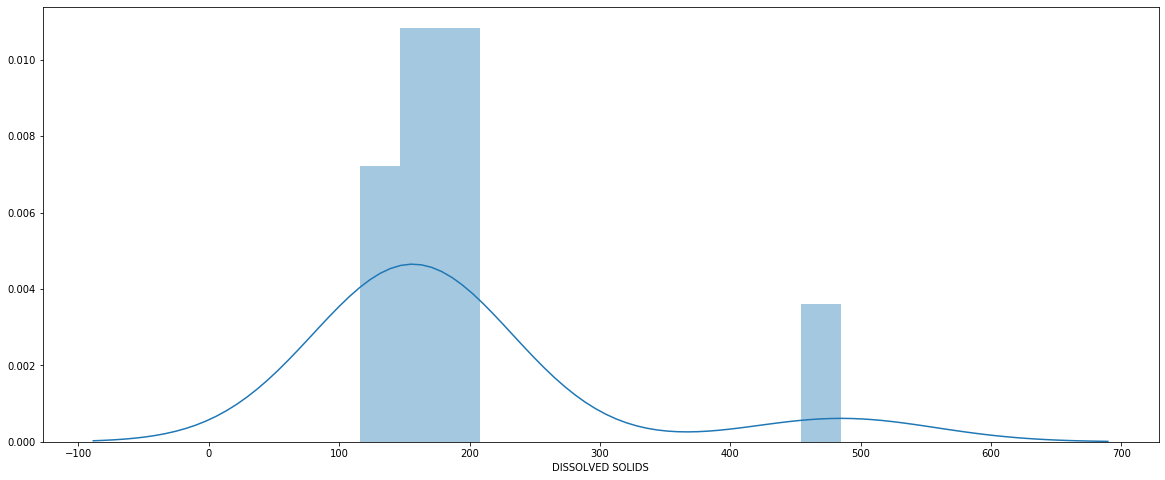

In [23]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.distplot(df_comb_concat['DISSOLVED SOLIDS'])

The Pearson Correlation Coefficient is 0.8969255164812742  with a P-value of P = 0.0010452555646469114


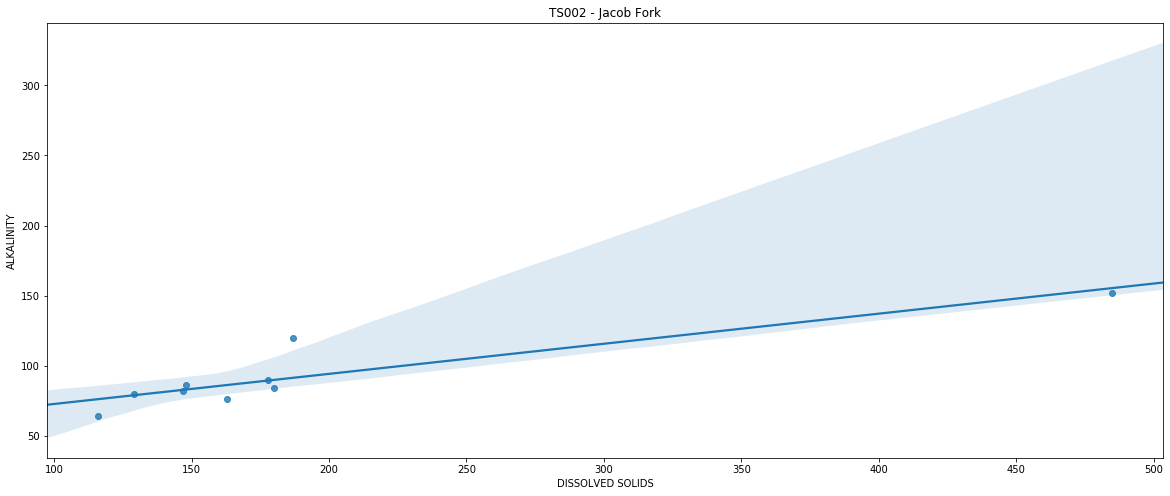

In [18]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.regplot(df_comb_concat['DISSOLVED SOLIDS'], df_comb_concat['ALKALINITY']).set_title('TS002 - Jacob Fork')

pearson_coef, p_value = stats.pearsonr(df_comb_concat['DISSOLVED SOLIDS'], df_comb_concat['ALKALINITY'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

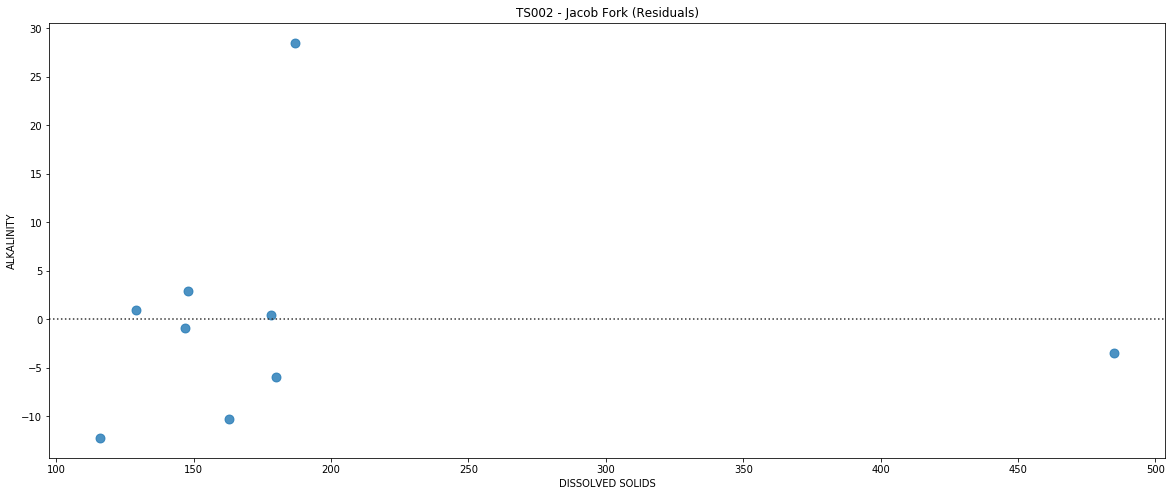

In [19]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x="DISSOLVED SOLIDS", y="ALKALINITY", data=df_comb_concat,scatter_kws={"s": 80}).set_title('TS002 - Jacob Fork (Residuals)');

The Pearson Correlation Coefficient is 0.3709862240064564  with a P-value of P = 0.3256344415757924


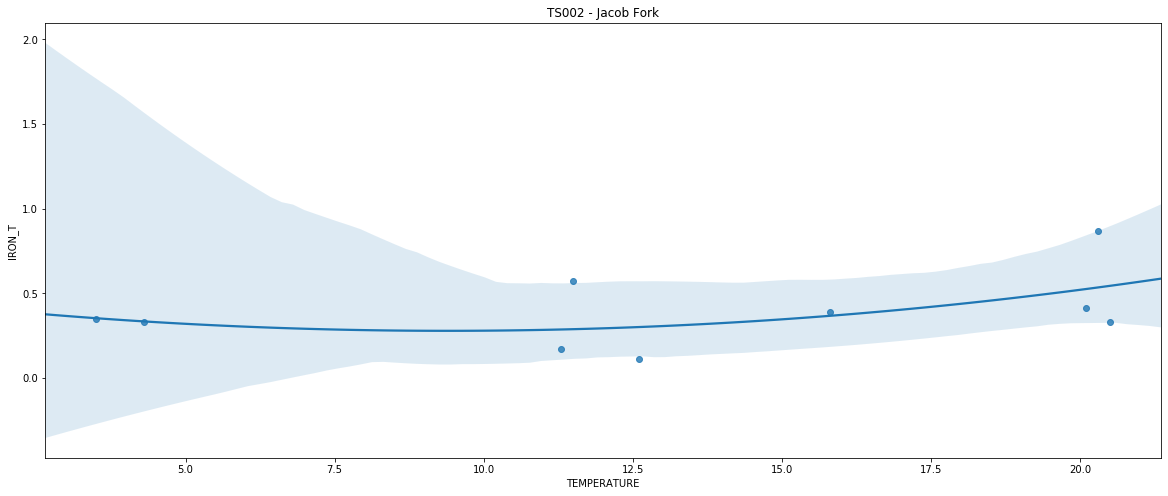

In [20]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.regplot(df_comb_concat['TEMPERATURE'], df_comb_concat['IRON_T'], order=2).set_title('TS002 - Jacob Fork')

pearson_coef, p_value = stats.pearsonr(df_comb_concat['TEMPERATURE'], df_comb_concat['IRON_T'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

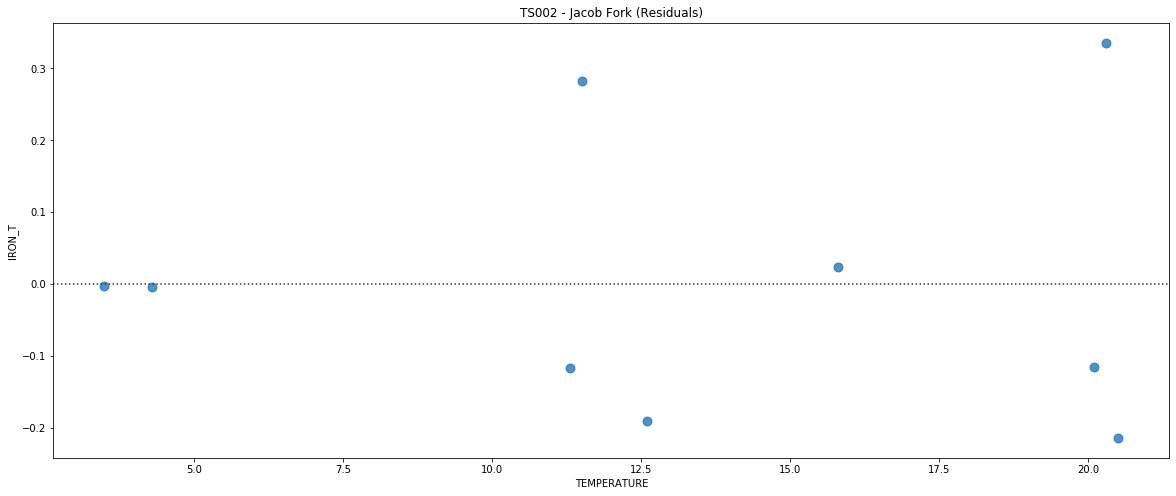

In [21]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x="TEMPERATURE", y="IRON_T", data=df_comb_concat, order=2, scatter_kws={"s": 80}).set_title('TS002 - Jacob Fork (Residuals)');

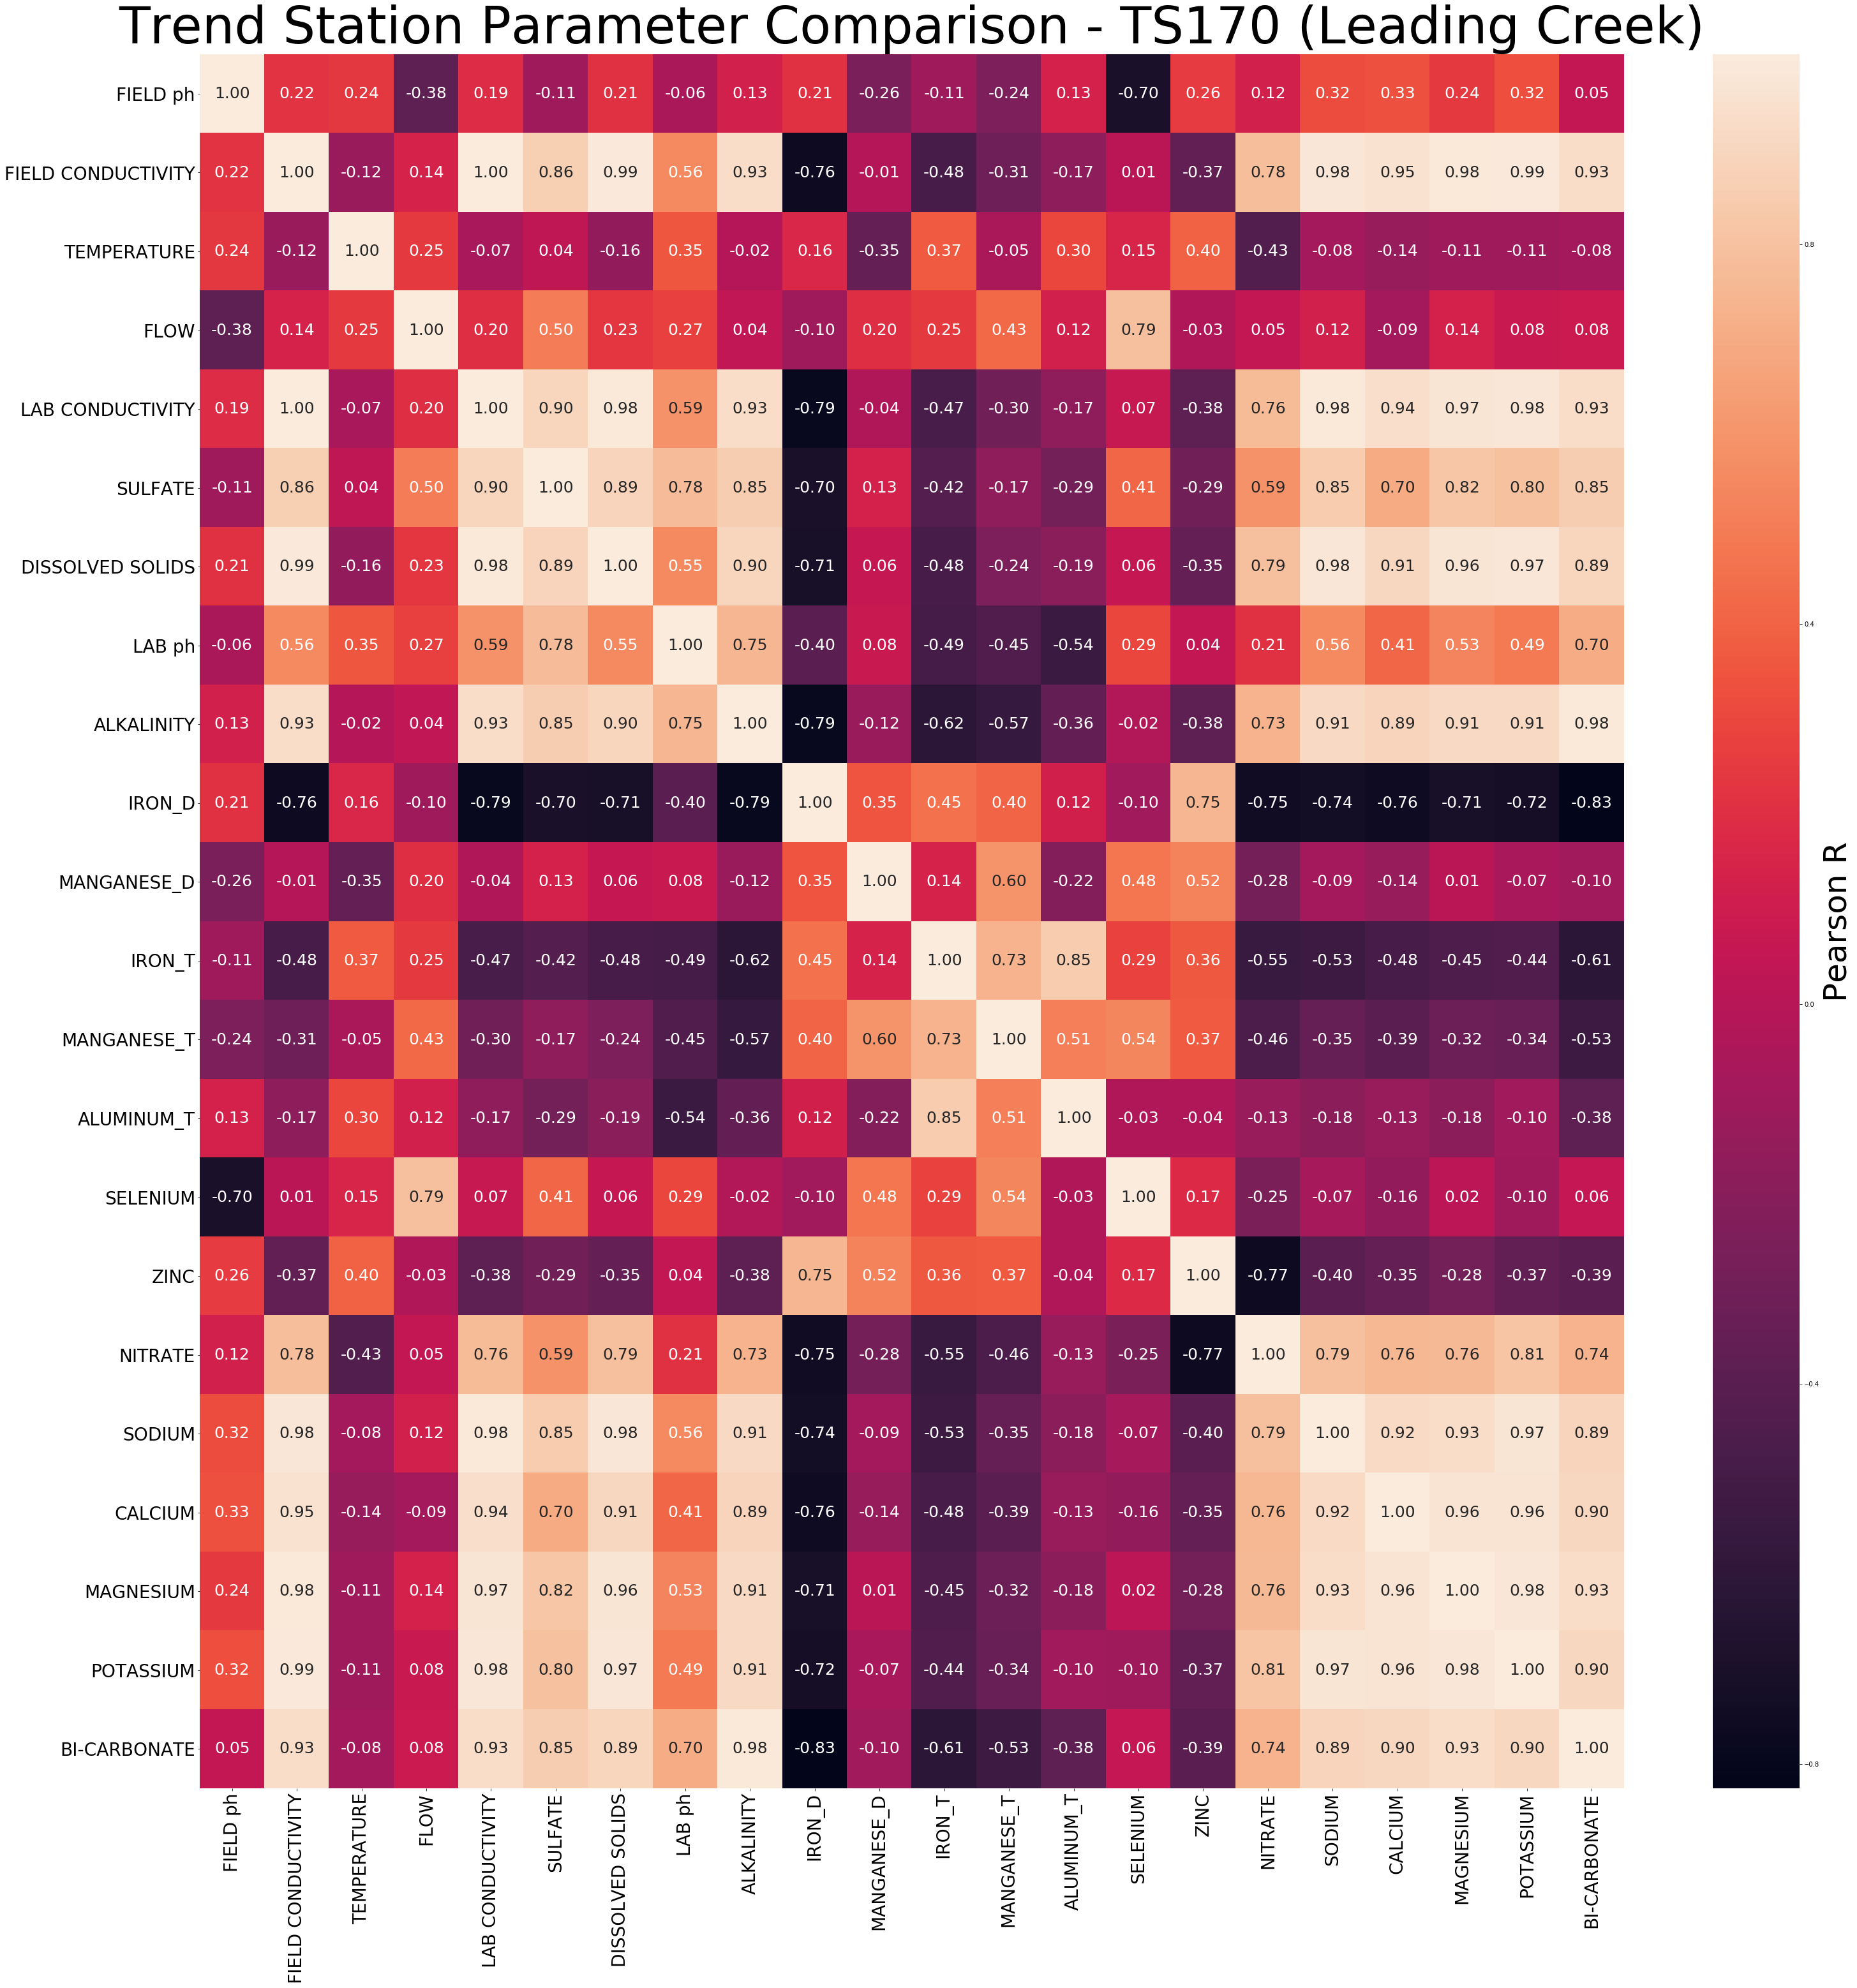

In [22]:
width = 50
height = 50
fig = plt.figure(figsize=(width, height))
ax1 = fig.add_subplot(111)
ax1.grid(True)
labels=['FIELD ph', 'FIELD CONDUCTIVITY','TEMPERATURE','FLOW', 'LAB CONDUCTIVITY', 'SULFATE', 'DISSOLVED SOLIDS', 'SUSPENDED SOLIDS', 'LAB ph', 'ALKALINITY', 'HOT ACIDITY', 'MINERAL ACIDITY', 'IRON_D', 'MANGANESE_D', 'ALUMINUM_D', 'IRON_T', 'MANGANESE_T', 'ALUMINUM_T', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'CADMIUM', 'CHROMIUM', 'COPPER', 'LEAD', 'MERCURY', 'NICKEL', 'SELENIUM', 'SILVER', 'THALLIUM', 'ZINC', 'CYANIDE', 'PHENOLS', 'NITRATE', 'SODIUM', 'CALCIUM', 'MAGNESIUM', 'POTASSIUM', 'BI-CARBONATE', 'CARBONATE', 'PHOSPHATE']
ax1.set_xticklabels(labels,fontsize=28)
ax1.set_yticklabels(labels,fontsize=28)
sns.heatmap(df_comb_concat.corr(), annot=True, fmt=".2f", annot_kws={"size": 25},cbar_kws={'label': 'Pearson R'})
plt.title('Trend Station Parameter Comparison - TS170 (Leading Creek)', fontsize=80)
ax1.figure.axes[-1].set_ylabel('Pearson R', size=50)
plt.show()